# Finetuning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('dataframe.pkl')

In [3]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_mean,texture_worst,smoothness_worst,concave_points_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
842302.0,0.521037,0.033070,0.545989,0.363733,0.792037,0.730526,0.768949,0.686364,0.196541,0.356147,...,0.450698,0.616677,0.568610,0.721311,0.418864,0.839315,0.185276,0.759737,0.962990,1
842517.0,0.643144,0.397828,0.615783,0.501591,0.181768,0.211538,0.366806,0.379798,0.186047,0.156437,...,0.435214,0.148757,0.192971,0.281540,0.222878,0.333834,0.397418,0.399343,0.674891,1
84300903.0,0.601496,0.569595,0.595743,0.449417,0.431017,0.480526,0.668583,0.509596,0.384019,0.229622,...,0.374508,0.381154,0.359744,0.486576,0.213433,0.707163,0.471389,0.592679,0.881713,1
84358402.0,0.629893,0.228529,0.630986,0.489290,0.347893,0.481986,0.545217,0.378283,0.314848,0.233822,...,0.341575,0.166732,0.319489,0.189831,0.142595,0.567503,0.162247,0.526983,0.589623,1
843786.0,0.258839,0.295656,0.267984,0.141506,0.461996,0.384129,0.422844,0.518687,0.196541,0.080753,...,0.136748,0.479232,0.427716,0.574958,0.454939,0.980478,0.409281,0.918348,0.631713,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926125.0,0.659709,0.759131,0.685578,0.510498,0.626403,0.772639,0.770518,0.550000,0.908766,0.308057,...,0.401543,0.375391,0.527077,0.324067,0.286567,0.711668,0.606769,0.557954,0.922351,1
926424.0,0.690000,0.625864,0.678668,0.566490,0.296055,0.593720,0.726085,0.336364,0.159809,0.385479,...,0.452664,0.172886,0.328035,0.117605,0.105667,0.728187,0.501745,0.560770,0.804064,1
926682.0,0.622320,0.915104,0.604036,0.474019,0.257714,0.350536,0.511814,0.349495,0.106142,0.236828,...,0.379915,0.154228,0.256789,0.239249,0.074315,0.529959,0.915213,0.331769,0.590711,1


In [4]:
def classificationMetrics(y, yhat):
    prf1 = metrics.precision_recall_fscore_support(y,yhat)
    res = {'Accuracy': metrics.accuracy_score(y,yhat),
           'Precision':prf1[0][1],
           'Recall': prf1[1][1],
           'f1-score': prf1[2][1],
           'Log-loss': metrics.log_loss(y,yhat),
           'AUC': metrics.roc_auc_score(y,yhat)
          }
    return res


In [5]:
X = df.loc[:,df.columns != 'diagnosis']
y = df['diagnosis']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [9]:
models_list = pd.DataFrame()

In [10]:
from sklearn.svm import SVC
mod = SVC(probability=True)
mod.fit(X,y)

SVC(probability=True)

In [12]:
pred = mod.predict(X)
model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **classificationMetrics(y, pred)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,Accuracy,Precision,Recall,f1-score,Log-loss,AUC
0,SVM,0.97989,0.994681,0.949239,0.971429,0.724827,0.973191


## run the test

In [13]:
pred_test = mod.predict(X_test)


In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
confusion_matrix(y_test,pred_test)

array([[102,   0],
       [  2,  61]], dtype=int64)

In [16]:
import sklearn.metrics as skmet
cmat=skmet.confusion_matrix(y_test,pred_test)

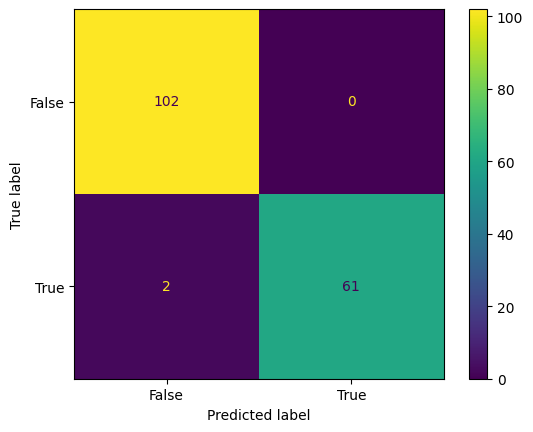

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmat, display_labels = [False, True])
cmat=skmet.confusion_matrix(y_test,pred_test)
cm_display.plot()
plt.show()

In [18]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       102
           1       1.00      0.97      0.98        63

    accuracy                           0.99       165
   macro avg       0.99      0.98      0.99       165
weighted avg       0.99      0.99      0.99       165



## looks like overfitting...

## finetuning SVC

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [21]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.948 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.896 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.883 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.882 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.961 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.908 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.649 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [24]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [25]:
grid_predictions = grid.predict(X_test)

In [26]:
print(confusion_matrix(y_test,grid_predictions))

[[100   2]
 [  2  61]]


In [27]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.97      0.97      0.97        63

    accuracy                           0.98       165
   macro avg       0.97      0.97      0.97       165
weighted avg       0.98      0.98      0.98       165



In [28]:
model = SVC(C=1)

In [29]:
model.fit(X_train, y_train)

SVC(C=1)

In [30]:
pred_test = model.predict(X_test)

In [31]:
model.score(X_train, y_train)

0.9790575916230366

In [32]:
model.score(X_test, y_test)

0.9636363636363636

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'gamma': np.logspace(-3, 3, 10),
    'kernel': ['rbf']
}

random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=20, refit=True, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print(f"Best parameters found: {random_search.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........C=215.44346900318823, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=215.44346900318823, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=215.44346900318823, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=215.44346900318823, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........C=215.44346900318823, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=2.154434690031882, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=2.154434690031882, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=2.154434690031882, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=2.154434690031882, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=2.154434690031882, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......C=46.41588833612773, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......C=46.41588833612773, gamma=0.00

In [35]:
random_prediction = random_search.predict(X_test)

In [36]:
print(confusion_matrix(y_test,random_prediction))

[[100   2]
 [  6  57]]


## gridsearch gave us the best parameters for SVM so we will use those parameters.


## total accuracy achieved is 0.96